In [1]:
import pymysql

In [2]:
conn = pymysql.connect(host='localhost', user='root', password='1234', db='usn', charset='utf8')

In [13]:
curs = conn.cursor(pymysql.cursors.DictCursor)

In [14]:
sql = """select * from usnnode"""

In [15]:
# try:
#     with conn.cursor(pymysql.cursors.DictCursor) as curs:
#         sql = """select * from usnnode"""
#         curs.execute(sql)
#         rs = curs.fetchall()
#         print(rs)
#         for row in rs:
#             print(row)
# finally:
#     conn.close()

[{'time': '11:56:23', 'node': '3', 'humi': '15.16', 'date': '2017-12-07', 'temp': '10.08', 'seq': 1}, {'time': '11:56:25', 'node': '3', 'humi': '15.88', 'date': '2017-12-07', 'temp': '10.22', 'seq': 2}, {'time': '11:56:27', 'node': '3', 'humi': '15.77', 'date': '2017-12-07', 'temp': '10.48', 'seq': 3}, {'time': '11:56:29', 'node': '3', 'humi': '15.72', 'date': '2017-12-07', 'temp': '10.92', 'seq': 4}, {'time': '11:56:31', 'node': '3', 'humi': '15.7', 'date': '2017-12-07', 'temp': '10.61', 'seq': 5}, {'time': '11:56:33', 'node': '3', 'humi': '15.94', 'date': '2017-12-07', 'temp': '10.74', 'seq': 6}, {'time': '11:56:35', 'node': '3', 'humi': '15.63', 'date': '2017-12-07', 'temp': '10.47', 'seq': 7}, {'time': '11:56:37', 'node': '3', 'humi': '15.39', 'date': '2017-12-07', 'temp': '10.26', 'seq': 8}, {'time': '11:56:39', 'node': '3', 'humi': '15.73', 'date': '2017-12-07', 'temp': '10.84', 'seq': 9}, {'time': '11:56:41', 'node': '3', 'humi': '15.83', 'date': '2017-12-07', 'temp': '10.36', '

In [3]:
import sys
from PyQt5.QtWidgets import *
from PyQt5.QtGui import *
import matplotlib.pyplot as plt
# pyqt5를 지원하는 matplotlib 모듈 호출
from matplotlib.backends.backend_qt5agg import FigureCanvasQTAgg as FigureCanvas

import pandas as pd
from pandas import Series, DataFrame

In [4]:
class MyWindow(QWidget):
    def __init__(self):
        super().__init__()
        self.setupUI()

    def setupUI(self):
        self.setGeometry(600, 200, 1200, 600)
        self.setWindowTitle("Usn Chart Viewer v0.1")
        self.setWindowIcon(QIcon('icon.png'))

        self.lineEdit = QLineEdit()
        self.pushButton = QPushButton("차트그리기")
        self.pushButton.clicked.connect(self.pushButtonClicked)
        
        # FigureCanvas 객체를 생성한다.
        self.fig = plt.Figure()
        self.canvas = FigureCanvas(self.fig)

        leftLayout = QVBoxLayout()
        leftLayout.addWidget(self.canvas)

        # Right Layout
        rightLayout = QVBoxLayout()
        rightLayout.addWidget(self.lineEdit)
        rightLayout.addWidget(self.pushButton)
        rightLayout.addStretch(1) # 크기 조절이 가능한 공백을 추가

        layout = QHBoxLayout()
        layout.addLayout(leftLayout)
        layout.addLayout(rightLayout)
        layout.setStretchFactor(leftLayout, 1)
        layout.setStretchFactor(rightLayout, 0)

        self.setLayout(layout)

    def pushButtonClicked(self):
        print(self.lineEdit.text())
        df = pd.read_sql('select * from usnnode', con = conn)
        ax = self.fig.add_subplot(111)
        ax.plot(df.index, df['temp'],label='temp')
        ax.plot(df.index, df['humi'],label='humi')
        ax.legend(loc='upper right')
        ax.grid()
        
        self.canvas.draw()

In [5]:
if __name__ == "__main__":
    app = QApplication(sys.argv)
    window = MyWindow()
    window.show()
    app.exec_()

KeyboardInterrupt: 

In [7]:
df = pd.read_sql('select * from usnnode', con = conn)

In [8]:
df

,seq,node,temp,humi,date,time
0,1,3,10.08,15.16,2017-12-07,11:56:23
1,2,3,10.22,15.88,2017-12-07,11:56:25
2,3,3,10.48,15.77,2017-12-07,11:56:27
3,4,3,10.92,15.72,2017-12-07,11:56:29
4,5,3,10.61,15.7,2017-12-07,11:56:31
5,6,3,10.74,15.94,2017-12-07,11:56:33
6,7,3,10.47,15.63,2017-12-07,11:56:35
7,8,3,10.26,15.39,2017-12-07,11:56:37
8,9,3,10.84,15.73,2017-12-07,11:56:39
9,10,3,10.36,15.83,2017-12-07,11:56:41


In [6]:
df.tail(5)

,seq,node,temp,humi,date,time
195,196,3,10.3,15.62,2017-12-07,12:03:02
196,197,3,10.67,15.12,2017-12-07,12:03:04
197,198,3,10.15,15.36,2017-12-07,12:03:06
198,199,3,10.75,15.97,2017-12-07,12:03:08
199,200,3,10.59,15.85,2017-12-07,12:03:10


In [9]:
df.index

RangeIndex(start=0, stop=200, step=1)

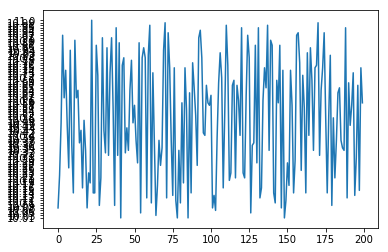

In [9]:
plt.plot(df['temp'])
plt.show()